In [5]:
import os
import sys
from collections import deque

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import gym
import torch
import torch.nn as nn
import torch.optim as optim

# configure module & syspath
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.agents import DiscreteActionSpaceAgent
from src.policies import CartPolePolicy

  5%|███████████                                                                                                                                                                                                                       | 49/1000 [00:03<01:02, 15.26it/s]

Solved.


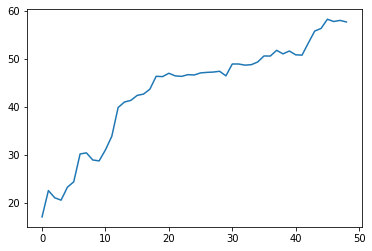

In [9]:
env = gym.make('CartPole-v1')

rewards_queue = deque()
rewards_ma = list()

agent = DiscreteActionSpaceAgent(
    CartPolePolicy(env.observation_space.shape[0], env.action_space.n),
    discount_factor = 0.99,
    use_baseline = True
)

optimizer = optim.Adam(agent.policy.parameters(), lr = 0.01)
max_episodes = 1000
max_trajectory_length = 200

for _ in tqdm(range(max_episodes)):
    state, _ = env.reset()

    for t in range(max_trajectory_length):
        action = agent.act(torch.from_numpy(state.astype(np.float32)))
        state, reward, done, _, _ = env.step(action)
        agent.rewards.append(reward)

        if done:
            break

    agent.tune(optimizer)
    total_reward = sum(agent.rewards)
    agent.reset()

    if len(rewards_queue) > 50:
        rewards_queue.popleft()

    if total_reward > 195.0:
        print('Solved.')
        plt.plot(rewards_ma)
        break

    rewards_queue.append(total_reward)
    mean_reward = np.mean(rewards_queue)
    rewards_ma.append(mean_reward)

In [ ]:
# using baseline
env = gym.make('CartPole-v1')

rewards_queue = deque()
rewards_ma = list()

agent = DiscreteActionSpaceAgent(
    CartPolePolicy(env.observation_space.shape[0], env.action_space.n),
    discount_factor = 0.99,
    use_baseline = True
)

optimizer = optim.Adam(agent.policy.parameters(), lr = 0.01)
max_episodes = 1000
max_trajectory_length = 200

for _ in tqdm(range(max_episodes)):
    state, _ = env.reset()

    for t in range(max_trajectory_length):
        action = agent.act(torch.from_numpy(state.astype(np.float32)))
        state, reward, done, _, _ = env.step(action)
        agent.rewards.append(reward)

        if done:
            break

    agent.tune(optimizer)
    total_reward = sum(agent.rewards)
    agent.reset()

    if len(rewards_queue) > 50:
        rewards_queue.popleft()
        
    if total_reward > 195.0:
        print('Solved.')
        plt.plot(rewards_ma)
        break

    rewards_queue.append(total_reward)
    mean_reward = np.mean(rewards_queue)
    rewards_ma.append(mean_reward)